In [107]:
import zipfile
import os

# Define paths
zip_path_1 = '/content/drive/MyDrive/HAM10000 dir/HAM10000_images_part_1.zip'
zip_path_2 = '/content/drive/MyDrive/HAM10000 dir/HAM10000_images_part_2.zip'
extract_path = '/content/'
output_folder_1 = os.path.join(extract_path, 'HAM10000 PT1')
output_folder_2 = os.path.join(extract_path, 'HAM10000 PT2')

# Create output folders if they don't exist
os.makedirs(output_folder_1, exist_ok=True)
os.makedirs(output_folder_2, exist_ok=True)

# Function to unzip a file to a specific directory
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Unzip the first file into the first output folder
unzip_file(zip_path_1, output_folder_1)

# Unzip the second file into the second output folder
unzip_file(zip_path_2, output_folder_2)

print(f"Files from {zip_path_1} have been extracted to {output_folder_1}")
print(f"Files from {zip_path_2} have been extracted to {output_folder_2}")



Files from /content/drive/MyDrive/HAM10000 dir/HAM10000_images_part_1.zip have been extracted to /content/HAM10000 PT1
Files from /content/drive/MyDrive/HAM10000 dir/HAM10000_images_part_2.zip have been extracted to /content/HAM10000 PT2


In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

import os
print(os.listdir("../content/drive/MyDrive/HAM10000 dir"))


['HAM10000_images_part_1.zip', 'HAM10000_images_part_2.zip', 'Ham10000 metadata csv.csv', 'Ham10000 metadata.gsheet', 'HAM 10000 metadata.csv']


In [113]:
# Define the path to your CSV file
csv_file_path = '/content/HAM10000_metadata'

# Read the CSV file with the correct delimiter
df = pd.read_csv(csv_file_path, delimiter=',')
#read metadata
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [114]:
df.tail()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back,vidir_modern


In [115]:
# Map classes to integers
classes = df['dx'].unique()
labeldict = {name: num for num, name in enumerate(classes)}
df['dx_id'] = df['dx'].map(lambda x: labeldict[x])

# Expand image paths
def expand_path(p):
    if isfile('../content/HAM10000 PT1/' + p + '.jpg'): return '../content/HAM10000 PT1/' + p + '.jpg'
    if isfile('../content/HAM10000 PT2/' + p + '.jpg'): return '../content/HAM10000 PT2/' + p + '.jpg'
    return p
df['image_path'] = df['image_id']
df['image_path'] = df['image_path'].apply(expand_path)

# Resize images to a common size
df['images'] = df['image_path'].map(lambda x: np.asarray(pil_image.open(x).resize((128, 128))))


In [116]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

lesion_names_short = ['nv','mel','bkl','bcc','akiec','vasc','df']

df['lesion_type']=df['dx'].map(lesion_type_dict)
df['lesion_ID'] = df['dx'].map(lesion_ID_dict)

print('Total number of images',len(df))
print('The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels')

df['lesion_type'].value_counts()

Total number of images 10015
The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels


lesion_type
Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: count, dtype: int64

In [117]:
# Convert images to numpy array and normalize
X = np.stack(df['images'])
X = X / 255.0  # Normalize images


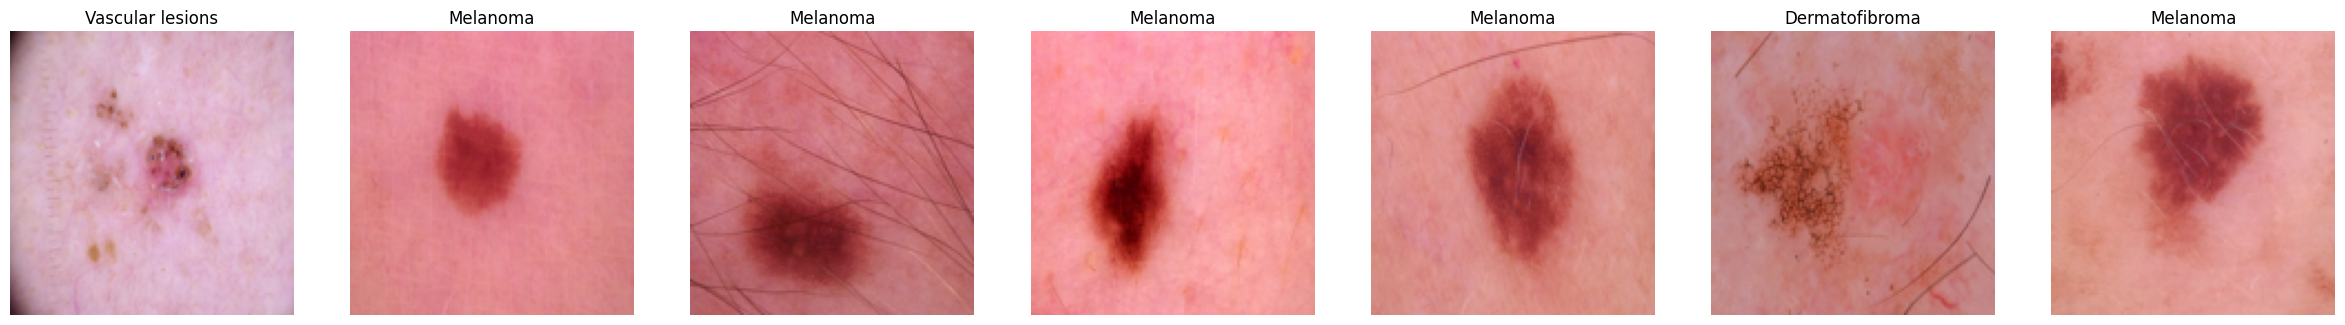

In [120]:
fig, ax = plt.subplots(1, 7, figsize=(30, 30))
for i in range(7):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(lesion_names[np.argmax(y_train[i])])

In [118]:

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, df['dx_id'], test_size=0.2, random_state=42, stratify=df['dx_id'])

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(classes))
y_val = tf.keras.utils.to_categorical(y_val, num_classes=len(classes))

# Debug prints to verify shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")


Shape of X_train: (8012, 128, 128, 3)
Shape of y_train: (8012, 7)
Shape of X_val: (2003, 128, 128, 3)
Shape of y_val: (2003, 7)


In [119]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import class_weight

In [121]:
# Define the CNN model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(classes), activation='softmax'))

    return model

model = create_model()

# Print model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_17 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 30, 30, 64)       

In [123]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping_monitor = EarlyStopping(patience=10, monitor='val_loss', min_delta=0.001, verbose=1, restore_best_weights=True)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.keras', save_weights_only=False, monitor='val_loss', mode='auto', save_best_only=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Data Augmentation
datagen = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Create augmented training dataset
train_gen = datagen.flow(X_train, y_train, batch_size=32, shuffle=True)

# Validation dataset (no augmentation)
validation_datagen = ImageDataGenerator()
validation_gen = validation_datagen.flow(X_val, y_val, batch_size=32, shuffle=False)

# Fit data for data augmentation
datagen.fit(X_train)

# Calculate class weights for handling imbalanced data
class_weights = compute_class_weight('balanced', classes=np.unique(df['dx_id']), y=df['dx_id'])
class_weights_dict = dict(enumerate(class_weights))

# Train the model
history = model.fit(
    train_gen,
    epochs=40,
    validation_data=validation_gen,
    callbacks=[early_stopping_monitor, model_checkpoint_callback, lr_scheduler],
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_val) // 32,
    class_weight=class_weights_dict
)

Epoch 1/40
250/250 [==============================] - ETA: 0s - loss: 1.8938 - accuracy: 0.3335
Epoch 1: val_loss improved from inf to 1.52864, saving model to best_model.keras
250/250 [==============================] - 29s 108ms/step - loss: 1.8938 - accuracy: 0.3335 - val_loss: 1.5286 - val_accuracy: 0.1361 - lr: 0.0010
Epoch 2/40
250/250 [==============================] - ETA: 0s - loss: 1.9469 - accuracy: 0.1347
Epoch 2: val_loss did not improve from 1.52864
250/250 [==============================] - 28s 113ms/step - loss: 1.9469 - accuracy: 0.1347 - val_loss: 1.9876 - val_accuracy: 0.0116 - lr: 0.0010
Epoch 3/40
250/250 [==============================] - ETA: 0s - loss: 1.9421 - accuracy: 0.0624
Epoch 3: val_loss did not improve from 1.52864
250/250 [==============================] - 28s 111ms/step - loss: 1.9421 - accuracy: 0.0624 - val_loss: 2.0512 - val_accuracy: 0.0519 - lr: 0.0010
Epoch 4/40
250/250 [==============================] - ETA: 0s - loss: 1.9559 - accuracy: 0.0404


In [124]:
# Evaluate the model on the test set
test_gen = validation_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)
score = model.evaluate(test_gen, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 18.697288513183594
Test accuracy: 0.44610777497291565


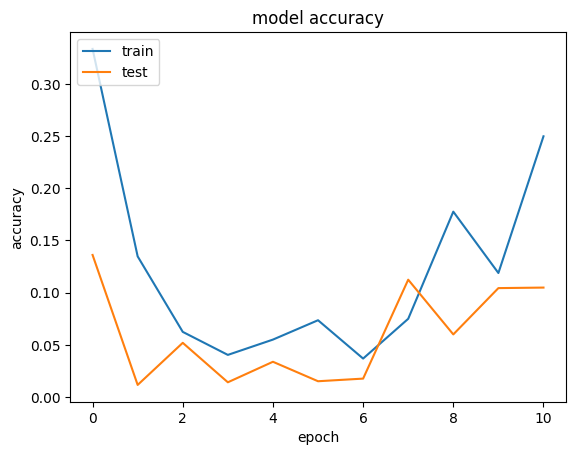

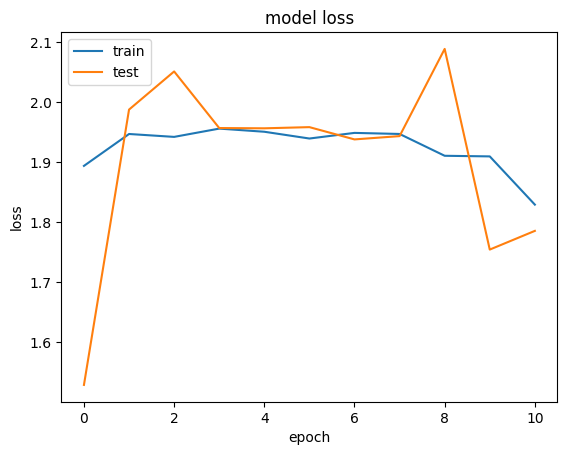

In [125]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [126]:
y_pred = model.predict(X_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)

    total += 1

print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)

print('Accuracy:', round(accurate/total*100, 3), '%')

32/32 [==============================] - 0s 6ms/step
Total-test-data; 1002 	accurately-predicted-data: 447 	 wrongly-predicted-data:  555
Accuracy: 44.611 %


In [129]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')

# compute predictions
y_pred_prob = np.around(best_model.predict(X_test),3)
y_pred = np.argmax(y_pred_prob,axis=1)

y_test2 = np.argmax(y_test,axis=1)

32/32 [==============================] - 0s 6ms/step


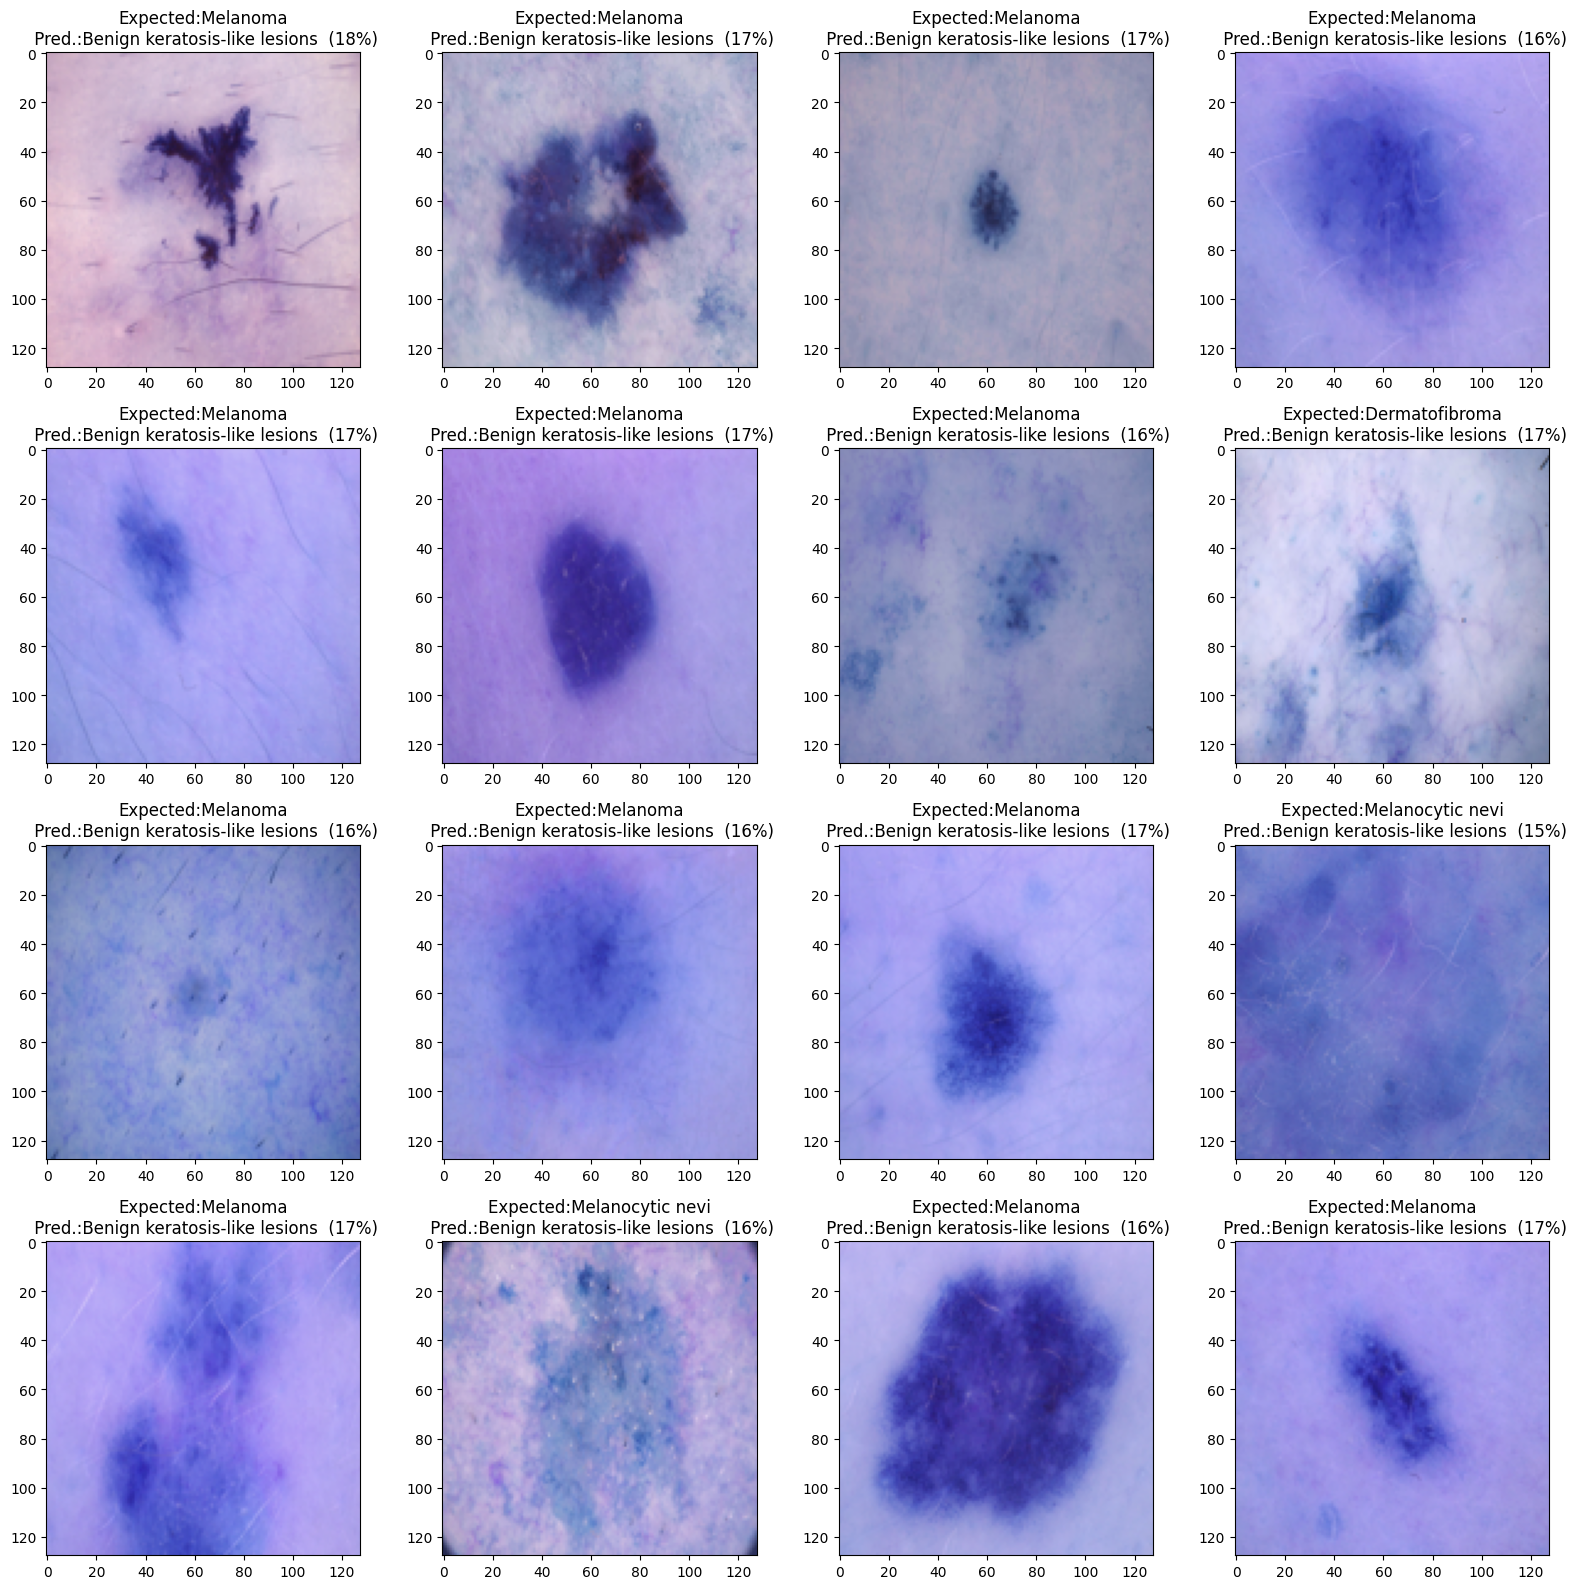

In [130]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(X_test[index,:,:,::-1])
    label_exp = lesion_names[y_test2[index]]  #expected label
    label_pred = lesion_names[y_pred[index]]  #predicted label
    label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred)+' ('+str(label_pred_prob)+'%)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('final_figure.png',dpi=300)
plt.show()

In [131]:
print('Accuracy for label equal to 0')
print(np.mean(y_test2[y_test2 == 0] == y_pred[y_test2 == 0]))

print('Accuracy for label different from 0')
print(np.mean(y_test2[y_test2 != 0] == y_pred[y_test2 != 0]))

Accuracy for label equal to 0
0.0
Accuracy for label different from 0
0.01233183856502242


In [132]:
acc_tot= []

for i in range(7):
    acc_parz = round(np.mean(y_test2[y_test2 == i] == y_pred[y_test2 == i]),2)
    lab_parz = lesion_names[i]
    print('accuracy for',lab_parz,'=',acc_parz)
    acc_tot.append(acc_parz)

accuracy for Melanocytic nevi = 0.0
accuracy for Melanoma = 0.0
accuracy for Benign keratosis-like lesions  = 1.0
accuracy for Basal cell carcinoma = 0.0
accuracy for Actinic keratoses = 0.0
accuracy for Vascular lesions = 0.0
accuracy for Dermatofibroma = 0.0


In [133]:
acc_tot = np.array(acc_tot)
freq = np.unique(y_test2,return_counts=True)[1]

np.sum(acc_tot*freq)/np.sum(freq)

0.010978043912175649

32/32 [==============================] - 0s 6ms/step


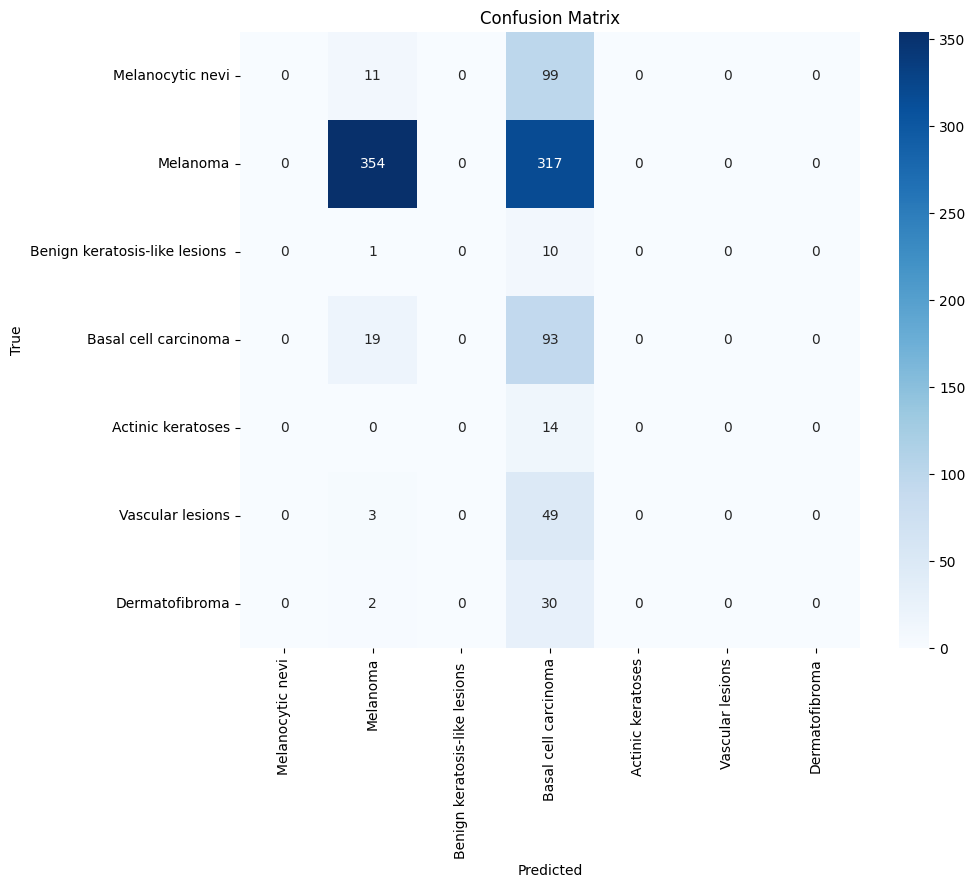

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Predict using the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)


# Compute confusion matrix
cm = confusion_matrix(y_test_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lesion_names, yticklabels=lesion_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns


# Classification report
report = classification_report(y_test_true, y_pred, target_names=lesion_names, output_dict=True)
print('Classification Report:', report)

# Extract metrics
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']
specificity = (cm.sum() - cm.sum(axis=0) - cm.sum(axis=1) + np.diag(cm)).sum() / (cm.sum() - cm.sum(axis=1)).sum()
efficiency = (precision + recall) / 2

print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Efficiency: {efficiency:.4f}')
print(f'F1 Score: {f1:.4f}')

# Compute predictions with the best model
y_pred_prob_best = np.around(best_model.predict(X_test), 3)
y_pred_best = np.argmax(y_pred_prob_best, axis=1)



Classification Report: {'Melanocytic nevi': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 110}, 'Melanoma': {'precision': 0.9076923076923077, 'recall': 0.5275707898658718, 'f1-score': 0.6672950047125353, 'support': 671}, 'Benign keratosis-like lesions ': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11}, 'Basal cell carcinoma': {'precision': 0.15196078431372548, 'recall': 0.8303571428571429, 'f1-score': 0.25690607734806625, 'support': 112}, 'Actinic keratoses': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14}, 'Vascular lesions': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 52}, 'Dermatofibroma': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 32}, 'accuracy': 0.44610778443113774, 'macro avg': {'precision': 0.15137901314371902, 'recall': 0.19398970467471638, 'f1-score': 0.13202872600865737, 'support': 1002}, 'weighted avg': {'precision': 0.6248314833379998, 'recall': 0.44610778443113774, 'f1-score': 0.47557

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 0s 6ms/step
